# Bike Sharing Data 불러오기

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


 데이터 설명
 
 season - 1 = spring , 2 = summer, 3 = fall, 4 = winter

 weather - 1 = Clear, 2 = Mist + Cloudy, 3 = Light Snow, Light Rain, 4 = Heavy Rain + Ice Pallets, Snow + Fog

In [3]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


 train 과 test data에 시계열 데이터를 형성합니다.

In [4]:
train["datetime"] = pd.to_datetime(train["datetime"])
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


In [5]:
test["datetime"] = pd.to_datetime(test["datetime"])

test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(6493, 15)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0


## 데이터 시각적 탐구

In [6]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='datetime-second', ylabel='count'>

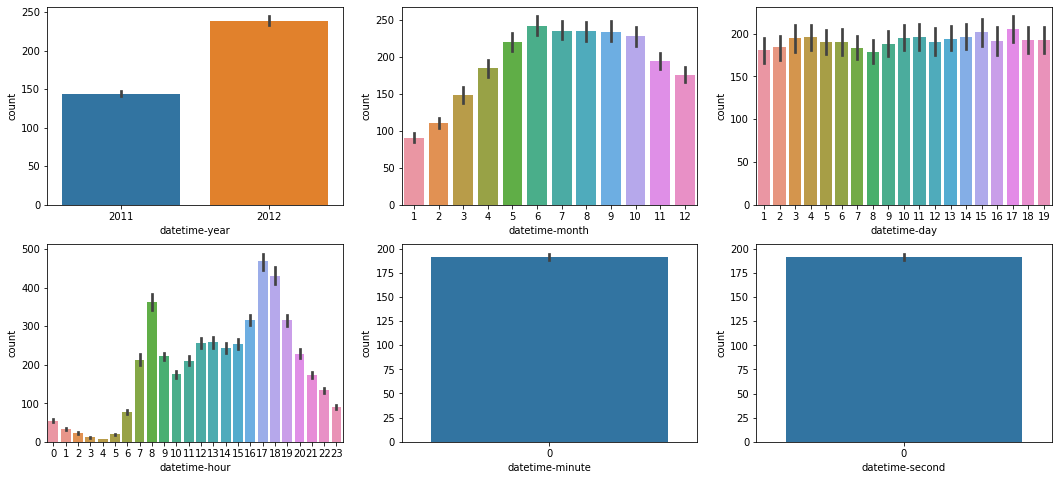

In [7]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)
# 연, 월, 일, 시, 분, 초 별 자전거 대여량을 출력합니다.
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

<AxesSubplot:xlabel='weather', ylabel='count'>

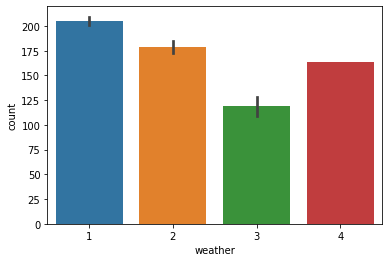

In [8]:
# seaborn의 barplot으로 날씨(weather) 데이터를 시각화합니다.
# x축에는 날씨(weather) 데이터를, y축에는 자전거 대여량(count)을 출력합니다.
sns.barplot(data=train, x="weather", y="count")

<AxesSubplot:xlabel='windspeed'>

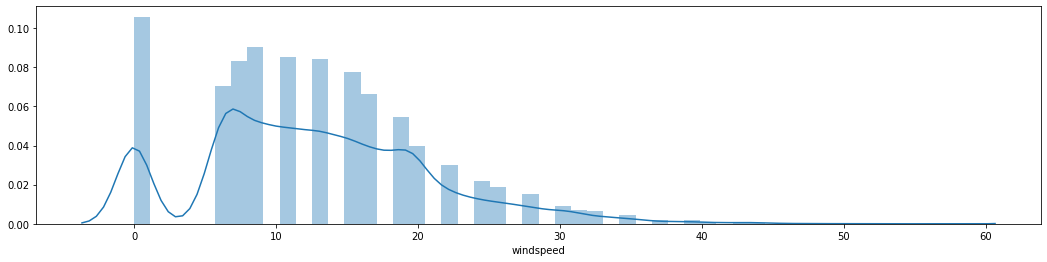

In [9]:
plt.figure(figsize = (18, 4))

# seaborn의 distplot으로 풍속(windspeed) 데이터를 시각화합니다.
# windspeed 데이터의 전체 분포(distribution)을 시각화합니다.
sns.distplot(train["windspeed"])

<AxesSubplot:xlabel='windspeed', ylabel='count'>

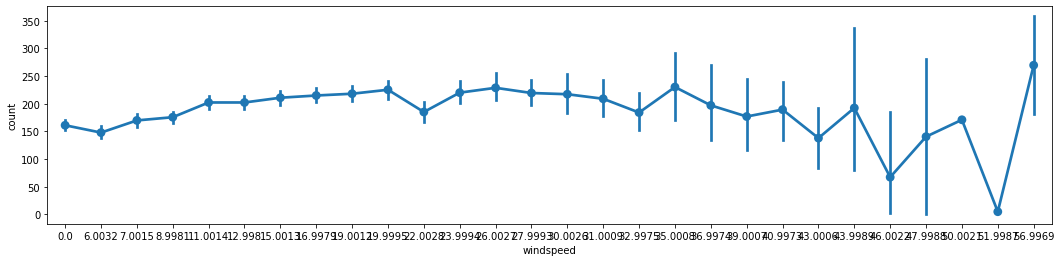

In [10]:
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 풍속(windspeed)에 따른 자전거 대여량의 변화를 시각화합니다.
# x축에는 풍속(windspeed)을, y축에는 자전거 대여량(count)을 집어넣습니다.
sns.pointplot(data = train, x="windspeed", y="count")

[0.    0.003 0.998 0.001 1.    0.998 0.001 0.998 0.001 0.003 0.003 0.999
 0.999 0.003 0.002 0.998 0.997 0.001 0.001 0.001 0.999 0.997 0.999 0.002
 0.002 0.001 0.997 0.999]


<AxesSubplot:xlabel='windspeed(point)'>

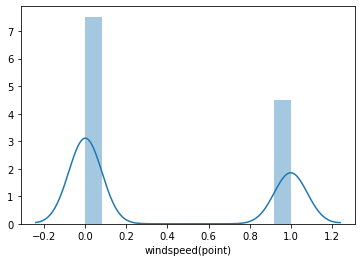

In [11]:
# 풍속(windspeed)데이터에서 소수점이 아닌 나머지를 제거합니다.
# 가령 풍속이 16.9979일 경우, 이를 정수형(int)으로 변환하여 16으로 만든 뒤 두 개를 뺍니다. (그러면 0.9979가 나옵니다)
# 이를 windspeed(point)라는 이름의 새로운 컬럼에 할당합니다.
train["windspeed(point)"] = train["windspeed"] - train["windspeed"].astype('int')

# windspeed(point) 컬럼의 중복을 제거하여 종류를 출력합니다.
# 간결할 형태로 출력하기 위해, 소수점 3자리로 줄입니다.
print(train["windspeed(point)"].unique().round(3))

# seaborn의 distplot으로 풍속(windspeed) 데이터를 시각화합니다.
# windspeed 데이터의 전체 분포(distribution)을 시각화합니다.
sns.distplot(train["windspeed(point)"])

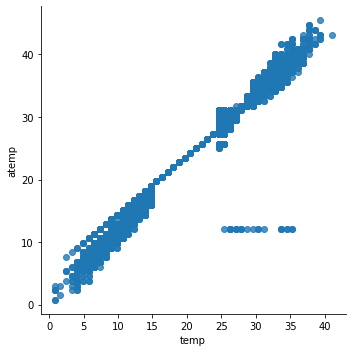

In [12]:
# seaborn의 lmplot으로 온도(temp)와 체감온도(atemp)의 상관관계를 시각화합니다.
# 여기서 추세선을 그리지 않기 위해 fit_reg 옵션은 False로 줍니다
sns.lmplot(data = train, x = 'temp' , y = 'atemp', fit_reg = False)

In [13]:
# 온도(temp)의 종류를 출력합니다. 생각보다 종류가 많지 않습니다.
train["temp"].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [14]:
# 체감온도(atemp)의 종류를 출력합니다. 생각보다 종류가 많지 않습니다.
train["atemp"].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

<AxesSubplot:xlabel='temp(int)', ylabel='atemp(int)'>

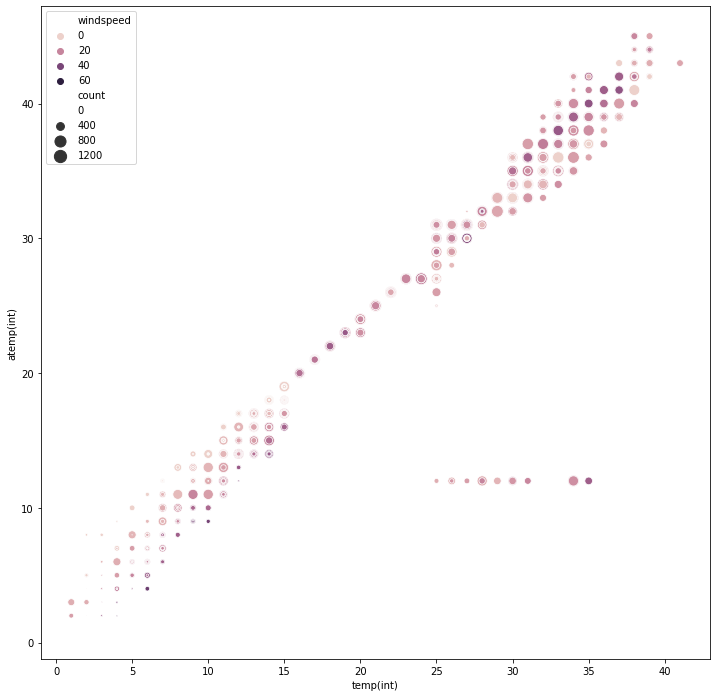

In [15]:
# 온도(temp)와 체감온도(atemp)는 반올림하여
# 각각 temp(int)와 atemp(int)라는 이름의 새로운 컬럼에 할당합니다.
train["temp(int)"] = train["temp"].round()
train["atemp(int)"] = train["atemp"].round()

plt.figure(figsize = (12,12))

# 이번에는 scatterplot을 활용해 온도(temp), 체감온도(atemp),
# 그리고 풍속(windspeed)과 자전거 대여량(count)간의 상관관계를 시각화합니다.

sns.scatterplot(data=train, x="temp(int)", y="atemp(int)", hue="windspeed", size="count", sizes=(0, 150))

In [16]:
# 정수형(int)으로 변환한 온도(temp)와 체감온도(atemp)를 빼서
# 두 값의 차이를 나타내는 temp(difference)라는 새로운 컬럼을 추가합니다.
train["temp(difference)"] = train["temp(int)"] - train["atemp(int)"]

# 정수형(int)으로 변환한 온도(temp)와 체감온도(atemp), 그리고 temp(difference)를 출력합니다.
train[["temp(int)", "atemp(int)", "temp(difference)"]].head()

,temp(int),atemp(int),temp(difference)
0,10.0,14.0,-4.0
1,9.0,14.0,-5.0
2,9.0,14.0,-5.0
3,10.0,14.0,-4.0
4,10.0,14.0,-4.0


<AxesSubplot:xlabel='temp(difference)', ylabel='count'>

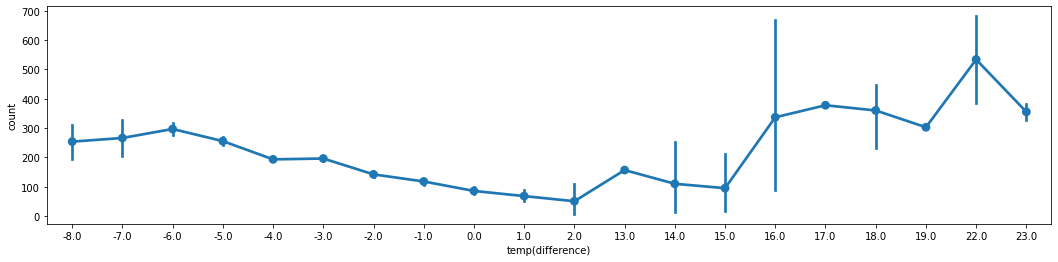

In [17]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 point으로 temp(difference)에 따른 자전거 변화량을 시각화합니다.
sns.pointplot(data=train, x="temp(difference)", y="count")

In [18]:
# temp(difference)의 종류와 그 개수를 출력합니다.
# -6 부터 0을 제외한 나머지는 모수가 부족하므로, 이를 하나로 합쳐줘도 될 것 같습니다.
train["temp(difference)"].value_counts()

-4.0     5106
-3.0     2097
-2.0     1415
-5.0     1049
-1.0      509
-6.0      405
 0.0      219
 1.0       32
-7.0       21
 22.0       5
-8.0        5
 14.0       5
 2.0        4
 16.0       3
 15.0       3
 18.0       3
 23.0       2
 17.0       1
 13.0       1
 19.0       1
Name: temp(difference), dtype: int64

<AxesSubplot:xlabel='temp(difference)', ylabel='count'>

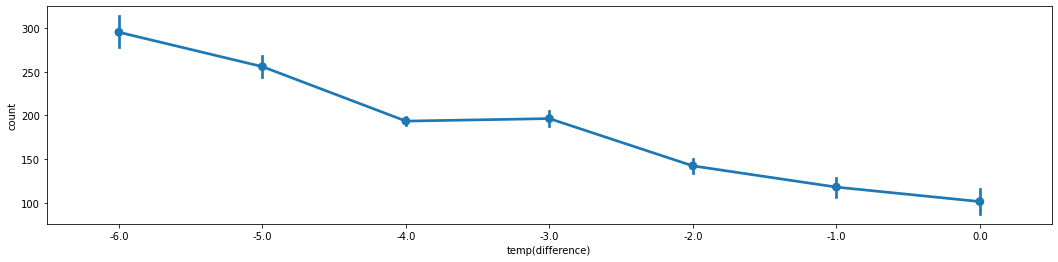

In [19]:
# temp(difference)가 -6보다 작은 데이터는 -6으로 통일시켜줍니다.
train.loc[train["temp(difference)"] < -6, "temp(difference)"] = -6

# 비슷하게, temp(difference)가 0보다 큰 데이터는 0으로 통일시켜줍니다.
train.loc[train["temp(difference)"] >  0, "temp(difference)"] = 0

# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 temp(difference)에 따른 자전거 변화량을 시각화합니다.
sns.pointplot(data=train, x="temp(difference)", y="count")

In [21]:
# train 데이터에 요일을 나타내는 새로운 컬럼을 생성합니다.
# 이 컬럼의 이름을 datetime-dayofweek이라고 가정합니다.
# 이 컬럼에 날짜(datetime) 컬럼의 dt(datetime의 약자입니다) 옵션을 활용하여 요일 정보를 따로 넣어줍니다.
train["datetime-dayofweek"] = train["datetime"].dt.day_name()

# 차후 이 정보를 머신러닝 알고리즘에 집어넣기 위해, 요일을 숫자로 변환한 dayofweek를 사용합니다.
# 이 값은 0(월요일) ~ 6(일요일) 사이의 값을 가집니다.
# 이를 datetime-dayofweek(int)라는 이름의 변수에 할당합니다.
train["datetime-dayofweek(int)"] = train['datetime'].dt.dayofweek

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head()로 train 데이터의 상위 5개를 띄우되,
# datetime 컬럼과 요일 컬럼만 출력합니다.
train[["datetime", "datetime-dayofweek", "datetime-dayofweek(int)"]].head()


(10886, 25)


,datetime,datetime-dayofweek,datetime-dayofweek(int)
0,2011-01-01 00:00:00,Saturday,5
1,2011-01-01 01:00:00,Saturday,5
2,2011-01-01 02:00:00,Saturday,5
3,2011-01-01 03:00:00,Saturday,5
4,2011-01-01 04:00:00,Saturday,5


In [22]:
# train 데이터와 마찬가지로 test 데이터의 datetime 컬럼에서 요일(dayofweek)정보를 뽑아냅니다.
test["datetime-dayofweek"] = test["datetime"].dt.day_name()

# 마찬가지로 숫자화된 요일 정보도 같이 가져옵니다.
test["datetime-dayofweek(int)"] = test["datetime"].dt.dayofweek

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# .head()로 test 데이터의 상위 5개를 띄우되,
# datetime 컬럼과 요일(datetime-dayofweek) 컬럼만 출력합니다.
test[["datetime", "datetime-dayofweek", "datetime-dayofweek(int)"]].head()

(6493, 17)


,datetime,datetime-dayofweek,datetime-dayofweek(int)
0,2011-01-20 00:00:00,Thursday,3
1,2011-01-20 01:00:00,Thursday,3
2,2011-01-20 02:00:00,Thursday,3
3,2011-01-20 03:00:00,Thursday,3
4,2011-01-20 04:00:00,Thursday,3


<AxesSubplot:xlabel='datetime-hour', ylabel='count'>

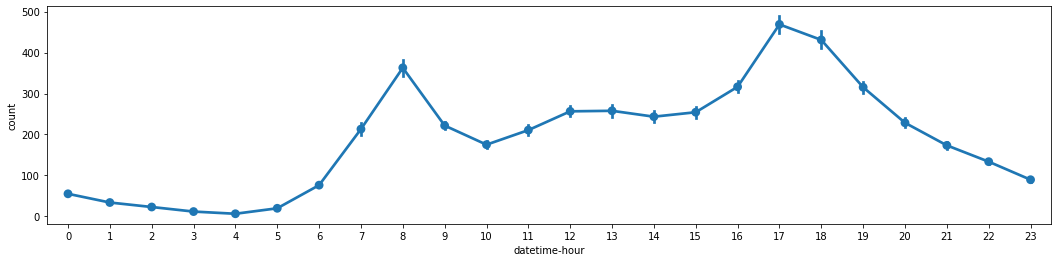

In [23]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 시간(datetime-hour)에 따른 자전거 변화량을 시각화합니다.
sns.pointplot(data=train, x="datetime-hour", y="count")

<AxesSubplot:xlabel='datetime-hour', ylabel='count'>

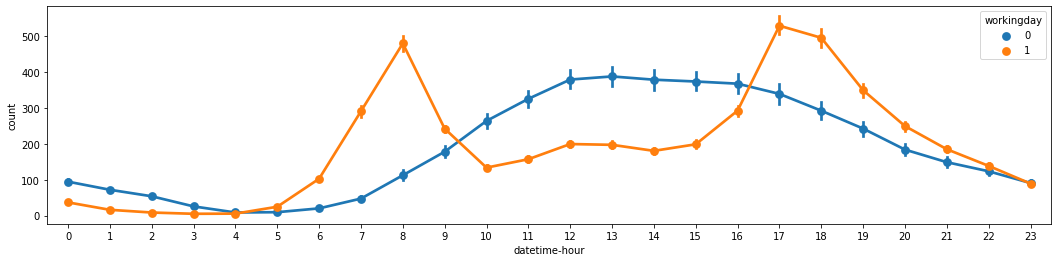

In [24]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 근무일 여부(workingday)와 시간(datetime-hour)에 따른 자전거 변화량을 시각화합니다.
# 확실히 근무하는 날과 근무하지 않는 날의 자전거 대여량이 명확하게 차이가 납니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday")

<AxesSubplot:xlabel='datetime-hour', ylabel='count'>

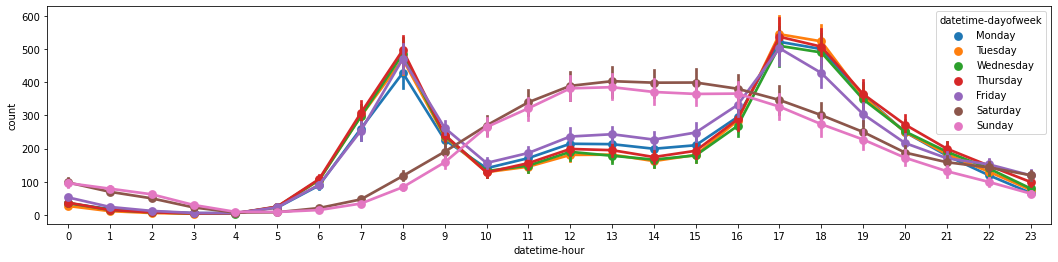

In [25]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# 시각화할 때 요일의 순서를 명확하게 지정하기 위해, 월~일까지의 영어 호칭을 리스트로 담습니다.
# 이를 dayofweek_order라는 이름의 변수에 할당합니다.

dayofweek_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# seaborn의 pointplot으로 요일(datetime-dayofweek)과 시간(datetime-hour)에 따른 자전거 변화량을 시각화합니다.
# 여기서 hue의 값을 dayofweek_order에 지정된 순서대로 출력하게 합니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", hue_order=dayofweek_order)

## Casual & Registered / 회원 , 비회원 간 사용 분석

이번에 분석할 데이터는 비회원과 회원을 나타내는 데이터, ```casual```과 ```registered``` 컬럼입니다. 이 컬럼을 자전거 대여량을 나타내는 ```count``` 컬럼과 거의 유사합니다. (실제로 ```casual``` 컬럼값과 ```registered``` 컬럼값을 더하면 ```count``` 컬럼값이 나옵니다)

하지만 아쉽게도 이 컬럼은 train 데이터에는 있지만 test 데이터에는 없습니다. 그러므로 이 데이터를 머신러닝 모델의 feature로 쓰는건 불가능합니다. 그렇다고 label로 쓰기에는, 우리가 맞춰야 하는 정답(=label)은 ```count``` 컬럼이죠. 하지만 그럼에도 불구하고, 이 두 개의 컬럼은 ```count``` 컬럼과 밀접한 연관이 있기 때문에, 잘 분석하고 이용한다면 머신러닝 모델의 성능을 크게 끌어올릴 수 있을 것 같습니다.

<AxesSubplot:xlabel='datetime-hour', ylabel='count'>

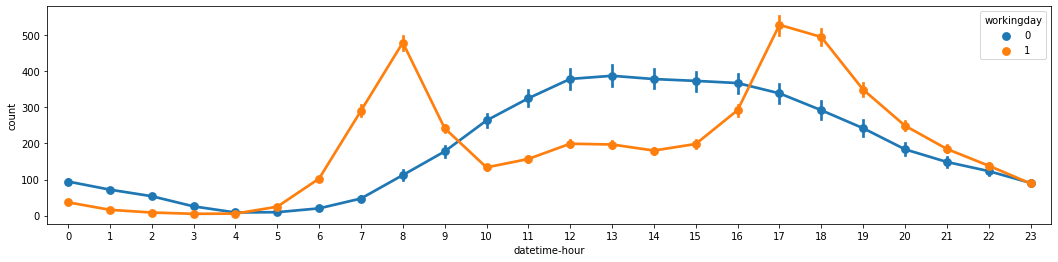

In [26]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 근무일 여부(workingday)와 시간(datetime-hour)에 따른 자전거 변화량을 시각화합니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday")

<AxesSubplot:xlabel='datetime-hour', ylabel='casual'>

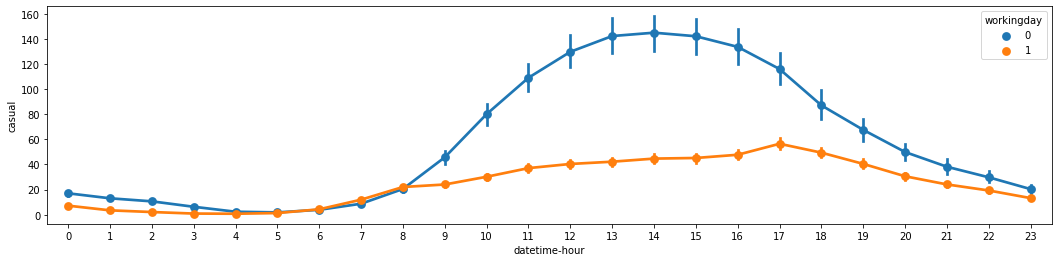

In [27]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 근무일 여부(workingday)와 시간(datetime-hour)에 따른 비회원의 자전거 변화량(casual)을 시각화합니다.
sns.pointplot(data=train, x="datetime-hour", y="casual", hue="workingday")

<AxesSubplot:xlabel='datetime-hour', ylabel='registered'>

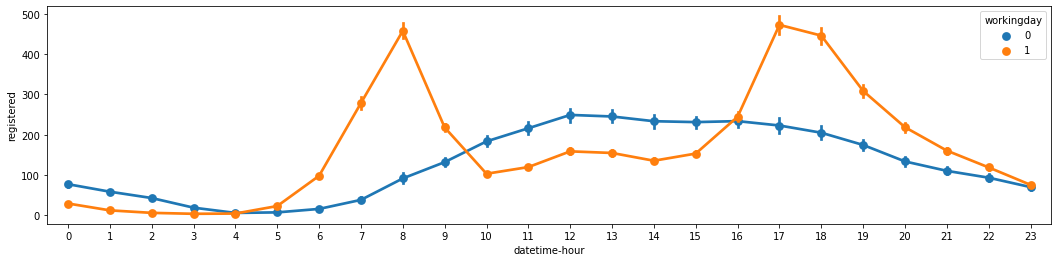

In [28]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 근무일 여부(workingday)와 시간(datetime-hour)에 따른 회원의 자전거 변화량(registered)을 시각화합니다.
sns.pointplot(data=train, x="datetime-hour", y="registered", hue="workingday")

In [29]:
# 연도(datetime-year)와 월(datetime-month)를 앞뒤로 붙인 datetime-year_month라는 이름의 컬럼을 추가합니다.
# 이 컬럼에는 2011년 1월부터 2012년 12월까지 총 24개의 값이 들어가있습니다.
train['datetime-year_month'] = train['datetime-year'].astype('str') + '-' + train['datetime-month'].astype('str')

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# head()로 train 데이터의 datetime과 datetime-year_month컬럼의 상위 5개를 띄웁니다.
train[["datetime", "datetime-year_month"]].head()

(10886, 26)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<AxesSubplot:xlabel='datetime-year_month', ylabel='count'>

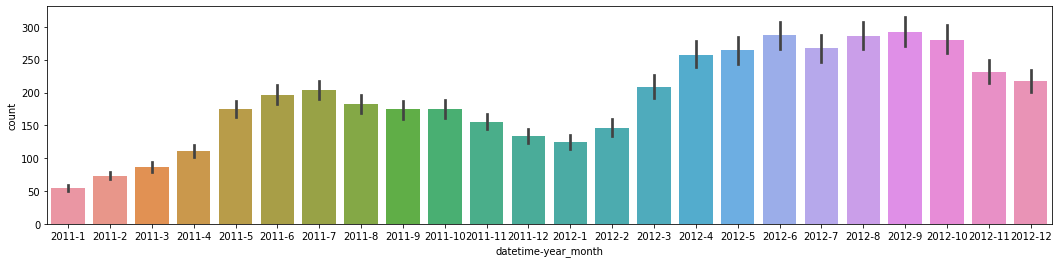

In [30]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 barplot으로 2011년 1월부터 2012년 12월까지의 자젼거 대여량의 변화량을 시각화합니다.
sns.barplot(data=train, x="datetime-year_month", y="count")

## Train

다음의 컬럼들을 Feature와 Label로 활용할 것입니다.

  * **Feature**: 1) 계절(```season```), 2) 공휴일(```holiday```), 3) 근무일(```workingday```), 4) 날씨(```weather```), 5) 온도(```temp```), 6) 체감 온도(```atemp```), 7) 습도(```humidity```), 8) 풍속(```windspeed```), 9) 연(```datetime-year```), 10) 시(```datetime-hour```), 11) 요일(```datetime-dayofweek(int)```) 입니다.
  
  * **Label**: 자전거 대여량(```count```)을 사용합니다.
  
이를 통해 train 데이터와 test 데이터를 다음의 세 가지 형태의 값으로 나눌 것입니다.

  * **X_train**: train 데이터의 feature 입니다. 줄여서 X_train이라고 부릅니다.
  * **X_test**: test 데이터의 feature 입니다. 마찬가지로 줄여서 X_test라고 부릅니다.
  * **y_train**: train 데이터의 label 입니다. 마찬가지로 줄여서 y_train이라고 부릅니다.

In [31]:
# 총 11개의 컬럼을 feature를 지정합니다.
# 이 11개의 컬럼명을 feature_names라는 이름의 파이썬 리스트(list)로 만들어 변수에 할당합니다.
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", "datetime-dayofweek(int)"]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek(int)']

In [32]:
# feature_names를 활용해 train 데이터의 feature를 가져옵니다.
# 이를 X_train이라는 이름의 변수에 할당합니다.
X_train = train[feature_names]

# X_train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_train.shape)

# X_train 데이터의 상위 5개를 띄웁니다.
X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek(int)
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [33]:
# feature_names를 활용해 test 데이터의 feature를 가져옵니다.
# 이를 X_test라는 이름의 변수에 할당합니다.
X_test = test[feature_names]

# X_test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_test.shape)

# X_test 데이터의 상위 5개를 띄웁니다.
X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek(int)
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


## Casual / Registered 를 활용하는 방법
 Count = Casual + Registerd 이므로, Casual 과 Registered 의 값을 따로 예측한 후 각각의 값을 더하는 방식을 사용


In [38]:
# train 데이터의 첫 번째 label에 해당하는 자전거 대여량(count)을 가져옵니다.
# 이를 y_train_count이라는 이름의 변수에 할당합니다.
y_train_count = train["count"]

# y_train_count 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train_count.shape)

# y_train_count 데이터의 상위 5개를 띄웁니다.
y_train_count.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [36]:
# 파이썬의 선형대수 패키지인 Numpy를 가져옵니다.
# 이를 줄여서 np라는 축약어로 사용합니다.
import numpy as np

# y_train_count에 log + 1 연산을 합니다.
# 이를 y_train_log_count라는 이름의 변수에 할당합니다.
y_train_log_count = np.log(y_train_count + 1)

# y_train_log_count 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train_log_count.shape)

# y_train_log_count 데이터의 상위 5개를 띄웁니다.
y_train_log_count.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [37]:
# label_name을 활용해 train 데이터의 label을 가져옵니다.
# 이를 y_train이라는 이름의 변수에 할당합니다.
y_train_casual = train["casual"]

# y_train 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train_casual.shape)

# y_train 데이터의 상위 5개를 띄웁니다.
y_train_casual.head(5)

(10886,)


0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

In [40]:
# y_train_casual에 log + 1 연산을 합니다.
# 이를 y_train_log_casual라는 이름의 변수에 할당합니다.
y_train_log_casual = np.log(y_train_casual + 1)

# y_train_log_casual 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train_log_casual.shape)

# y_train_log_casual 데이터의 상위 5개를 띄웁니다.
y_train_log_casual.head()

(10886,)


0    1.386294
1    2.197225
2    1.791759
3    1.386294
4    0.000000
Name: casual, dtype: float64

In [41]:
# train 데이터의 세 번째 label에 해당하는 회원의 자전거 대여량(registered)을 가져옵니다.
# 이를 y_train_registered이라는 이름의 변수에 할당합니다.
y_train_registered = train["registered"]

# y_train_registered 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train_registered.shape)

# y_train_registered 데이터의 상위 5개를 띄웁니다.
y_train_registered.head()

(10886,)


0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

In [42]:
# y_train_registered에 log + 1 연산을 합니다.
# 이를 y_train_log_registered라는 이름의 변수에 할당합니다.
y_train_log_registered = np.log(y_train_registered + 1)

# y_train_log_registered 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train_log_registered.shape)

# y_train_log_registered 데이터의 상위 5개를 띄웁니다.
y_train_log_registered.head()

(10886,)


0    2.639057
1    3.496508
2    3.332205
3    2.397895
4    0.693147
Name: registered, dtype: float64

# Random Forest

In [43]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor를 생성합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) n_estimators. 트리의 개수입니다. 10을 넣으면 10개의 트리를 생성합니다.
# 2) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
# 3) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다.
model = RandomForestRegressor(n_estimators = 10,
                              n_jobs = -1,
                              random_state = 37)

model


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=37)

In [44]:
from sklearn.model_selection import cross_val_predict

y_predict_casual = cross_val_predict(model, X_train, y_train_casual, cv = 20)
y_predict_registered = cross_val_predict(model, X_train, y_train_registered, cv = 20)

y_predict = y_predict_casual + y_predict_registered

y_predict

array([ 40.6,  25. ,  23.2, ..., 203.4, 180.6, 138.6])

In [46]:
# 파이썬의 선형대수 패키지인 Numpy를 가져옵니다.
# 이를 줄여서 np라는 축약어로 사용합니다.
import numpy as np

# scikit-learn의 metrics 모듈에서 mean_squared_log_error 라는 이름의 함수를 가져옵니다.
# 이 함수는 앞서 설명한 RMSLE에서 R(Root)를 제외한 나머지 부분을 계산해줍니다.
from sklearn.metrics import mean_squared_log_error

# train 데이터의 label에 해당하는 y_train과, train 데이터의 label의 예측값인 y_predict를 활용하여
# mean squared logarithmic error(MSLE)를 계산합니다.
# 이후 여기에 numpy의 sqrt를 활용하여 루트 연산을 합니다.
# 이 결과가 사실상 Root Mean Squared Logarithmic Error(RMSLE)가 됩니다.
# 이를 score 라는 이름의 변수에 할당합니다.

score = mean_squared_log_error(y_train_count,y_predict)
score = np.sqrt(score)

# score 변수 안에 들어가있는 점수를 출력합니다. 출력하되,
# 소수점 5자리까지만 출력하고 나머지는 반올림합니다.
print(f"Score(RMSLE) = {score:.5f}")

Score(RMSLE) = 0.38028


## Predict

In [47]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# 하이퍼패러미터 튜닝이 끝났으면, 이제 n_estimators를 가능한 높은 값을 주겠습니다.
best_n_estimators = 3000

best_max_depth = 97
best_max_features = 0.897703

# RandomForestRegressor를 생성합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) n_estimators. 트리의 갯수입니다. 지정한 갯수만큼 트리를 생성합니다.
# 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
# 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
# 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
# 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
model = RandomForestRegressor(n_estimators = best_n_estimators,
                              max_depth = best_max_depth,
                              max_features = best_max_features,
                              random_state = 37,
                              n_jobs = -1)

model

RandomForestRegressor(max_depth=97, max_features=0.897703, n_estimators=3000,
                      n_jobs=-1, random_state=37)

In [48]:
# 머신러닝 모델을 학습하되, log + 1 연산을 한 비회원의 자전거 대여량(casual)을 label로 지정합니다.
model.fit(X_train, y_train_log_casual)

# 이 모델로 test 데이터의 log + 1 연산을 한 비회원의 자전거 대여량(casual)을 예측합니다.
log_casual_predictions = model.predict(X_test)

# 머신러닝 모델을 학습하되, log + 1 연산을 한 회원의 자전거 대여량(registered)을 label로 지정합니다.
model.fit(X_train, y_train_log_registered)

# 이 모델로 test 데이터의 log + 1 연산을 한 회원의 자전거 대여량(registered)을 예측합니다.
log_registered_predictions = model.predict(X_test)

# 머신러닝 모델을 학습하되, log + 1 연산을 한 자전거 대여량(count)을 label로 지정합니다.
model.fit(X_train, y_train_log_count)

# 이 모델로 test 데이터의 log + 1 연산을 한 자전거 대여량(count)을 예측합니다.
log_count_predictions = model.predict(X_test)

# 세 개의 예측값에 전부 exp - 1 연산을 해서
# 원래 자전거 대여량으로 변환합니다.
casual_predictions = np.exp(log_casual_predictions) - 1
registered_predictions = np.exp(log_registered_predictions) - 1
count_predictions = np.exp(log_count_predictions) - 1

# 이 자전거 대여량을 기하평균을 사용하여 하나로 합칩니다.
# 그 결과를 predictions 이라는 값에 할당합니다.
predictions = np.sqrt((casual_predictions + registered_predictions) * count_predictions)

# predictions 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(predictions.shape)

# predictions 데이터 띄웁니다.
predictions

(6493,)


array([ 11.70097909,   5.00303247,   2.8207818 , ..., 100.54859576,
        96.04806109,  46.84719774])

## Submit

In [49]:
submission = pd.read_csv('sampleSubmission.csv')

print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [50]:
submission['count'] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.700979
1,2011-01-20 01:00:00,5.003032
2,2011-01-20 02:00:00,2.820782
3,2011-01-20 03:00:00,2.722422
4,2011-01-20 04:00:00,2.342914


In [51]:
submission.to_csv('kaggel-bike_sharing_prediction.csv', index = False)